# Financial Data Analysis: Key Metrics and Tools

In this notebook, we will cover essential financial analysis tools and metrics, exploring how to analyze stock market data using Python. We will walk through the following key concepts:

- **1. Price Movements and Returns**
  - Simple Returns
  - Logarithmic Returns
- **2. Risk Analysis**
  - Volatility
  - Value at Risk (VaR)
- **3. Correlation and Covariance**
  - Covariance Matrix
  - Correlation Coefficients
- **4. Moving Averages**
  - Simple Moving Average (SMA)
  - Exponential Moving Average (EMA)
- **5. Sharpe Ratio**

We'll also include visualizations along the way to better illustrate each concept.

### 1.1 Price Movements

Financial analysis often starts by looking at **price movements** over time. This is the foundation for understanding how a stock behaves.

### 1.2 Returns

Returns measure how much a stock's price has increased or decreased over a specific period.

#### **Simple Returns**
The simple return at time t is calculated as:

$$ R_t = \frac{P_t}{P_{t-1}} - 1 $$

#### **Logarithmic Returns**
Logarithmic returns are often preferred because they are additive over time:

$$ r_t = \ln \left( \frac{P_t}{P_{t-1}} \right) $$

Let's calculate and visualize the returns using some financial data.

[*********************100%%**********************]  1 of 1 completed


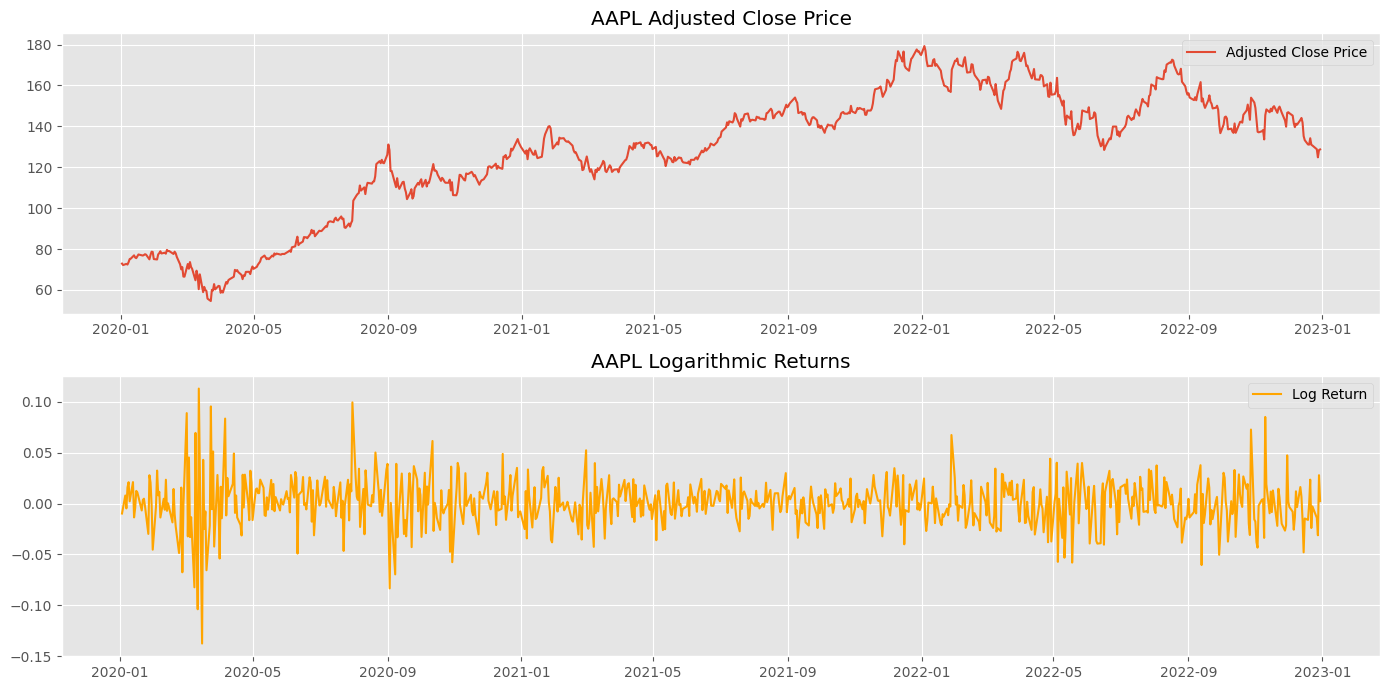

In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Download historical stock data for Apple (AAPL)
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Calculate simple and log returns
data['Simple Return'] = data['Adj Close'].pct_change()
data['Log Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Plot price and returns
plt.figure(figsize=(14,7))
plt.style.use('ggplot')

plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adjusted Close Price')
plt.title('AAPL Adjusted Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['Log Return'], label='Log Return', color='orange')
plt.title('AAPL Logarithmic Returns')
plt.legend()

plt.tight_layout()
plt.show()

### 2.1 Volatility

Volatility measures the extent of price fluctuations over time. A common metric is **standard deviation** of returns:

$$ \sigma = \sqrt{\frac{1}{n} \sum_{t=1}^{n} (R_t - \bar{R})^2} $$

With :
$$
\text{Volatility } (\sigma) \\
\text{Return at time } (R_t) \\
\text{Average return } (\bar{R})
$$

Let's calculate and visualize volatility using a rolling window.

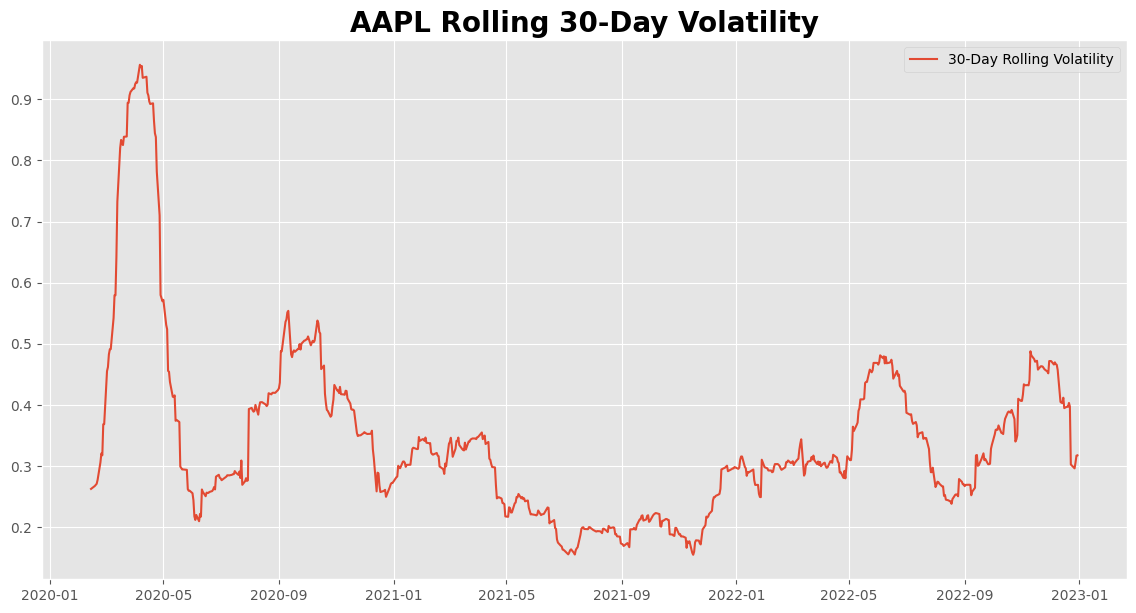

In [4]:
# Calculate volatility (standard deviation of log returns) over a rolling window of 30 days
data['Volatility'] = data['Log Return'].rolling(window=30).std() * np.sqrt(252)  # Annualized volatility

# Plot volatility
plt.figure(figsize=(14,7))
plt.style.use('ggplot')
plt.plot(data['Volatility'], label='30-Day Rolling Volatility')
plt.title('AAPL Rolling 30-Day Volatility', fontweight='bold', fontsize=20)
plt.legend()
plt.show()

### 2.2 Value at Risk (VaR)

**VaR** estimates the maximum potential loss over a given time frame with a certain confidence level. For example, the **95% VaR** can be computed using the quantile of returns:

$$ VaR_{0.05} = \text{quantile}(R_t, 0.05) $$

We'll calculate the 95% VaR for our log returns.

In [5]:
# Calculate 95% Value at Risk (VaR)
VaR_95 = np.percentile(data['Log Return'].dropna(), 5)
print(f"95% VaR: {VaR_95:.4f}")

95% VaR: -0.0355


### 3.1 Covariance Matrix

Covariance measures how two assets move together. The covariance matrix for two assets \( X \) and \( Y \) is given by:

$$ \text{Cov}(X, Y) = \frac{1}{n} \sum_{t=1}^{n} (X_t - \bar{X})(Y_t - \bar{Y}) $$

### 3.2 Correlation Coefficient

The correlation coefficient normalizes covariance between -1 and 1:

$$ \rho_{X, Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$

Let's calculate and visualize the correlation between AAPL and MSFT (Microsoft).

[*********************100%%**********************]  1 of 1 completed


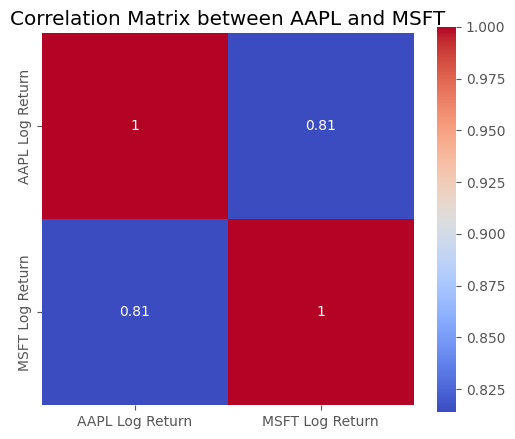

In [6]:
import seaborn as sns 

# Download MSFT data
msft_data = yf.download('MSFT', start='2020-01-01', end='2023-01-01')

# Calculate log returns for both AAPL and MSFT
msft_data['Log Return'] = np.log(msft_data['Adj Close'] / msft_data['Adj Close'].shift(1))

# Combine data and calculate correlation
combined_data = pd.concat([data['Log Return'], msft_data['Log Return']], axis=1)
combined_data.columns = ['AAPL Log Return', 'MSFT Log Return']

correlation = combined_data.corr()

# Plot correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix between AAPL and MSFT')
plt.show()

### 4.1 Simple Moving Average (SMA)

The **Simple Moving Average (SMA)** smooths out price data by averaging it over a specific window:

$$ SMA_t = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i} $$

### 4.2 Exponential Moving Average (EMA)

The **Exponential Moving Average (EMA)** gives more weight to recent prices:

$$ EMA_t = P_t \cdot \frac{2}{n+1} + EMA_{t-1} \cdot \left(1 - \frac{2}{n+1}\right) $$

Let’s plot the SMA and EMA for AAPL.

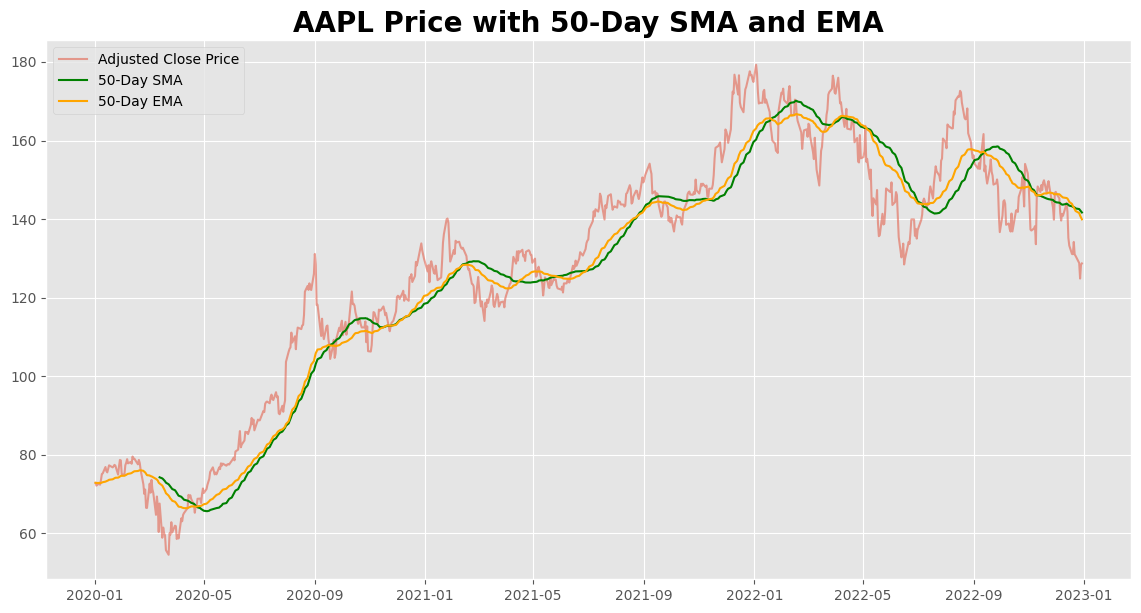

In [7]:
# Calculate 50-day SMA and 50-day EMA
data['SMA_50'] = data['Adj Close'].rolling(window=50).mean()
data['EMA_50'] = data['Adj Close'].ewm(span=50, adjust=False).mean()

# Plot SMA and EMA
plt.figure(figsize=(14,7))
plt.style.use('ggplot')
plt.plot(data['Adj Close'], label='Adjusted Close Price', alpha=0.5)
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.plot(data['EMA_50'], label='50-Day EMA', color='orange')
plt.title('AAPL Price with 50-Day SMA and EMA', fontweight='bold', fontsize=20)
plt.legend()
plt.show()

The **Sharpe Ratio** measures the performance of an asset compared to a risk-free asset, after adjusting for risk:

$$ S = \frac{R_p - R_f}{\sigma_p} $$

With :
$$
\text{Portfolio return } (R_p) \\
\text{Risk-free rate } (R_f) \\
\text{Portfolio's volatility } (\sigma_p)
$$

- **Risk-free rate** represents the return of an investment with zero risk, such as government bonds.
- **A Portfolio's Volatility** measures the degree of variation in the portfolio's returns over time.

Let's calculate the Sharpe Ratio assuming a risk-free rate of 0.02 (2%).

In [8]:
# Calculate annualized return and volatility
annualized_return = data['Log Return'].mean() * 252
annualized_volatility = data['Log Return'].std() * np.sqrt(252)
risk_free_rate = 0.02

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 0.46


***This notebook covers essential financial metrics and tools, helping understand how to analyze stock price data, measure risk, and evaluate portfolio performance.***